In [1]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def analyze_tls_certificates(root_folder):
    all_data = []

    for province_folder in os.listdir(root_folder):
        province_path = os.path.join(root_folder, province_folder)

        if os.path.isdir(province_path):
            for json_file in os.listdir(province_path):
                json_file_path = os.path.join(province_path, json_file)

                if os.path.isfile(json_file_path) and json_file.endswith(".json"):
                    with open(json_file_path, 'r', encoding='utf-8') as f:
                        json_data = json.load(f)
                        all_data.append(json_data)

    return all_data

In [8]:
# 设置你的根目录
root_folder = "./ca"

# 进行数据分析
all_data = analyze_tls_certificates(root_folder)

Certificate Fields Analysis:


D:\zm157\AppData\Local\Temp\ipykernel_22172\2462027294.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_values.keys()), y=list(sorted_values.values()), palette=custom_palette)
D:\zm157\AppData\Local\Temp\ipykernel_22172\2462027294.py:41: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(sorted_values.keys()), y=list(sorted_values.values()), palette=custom_palette)


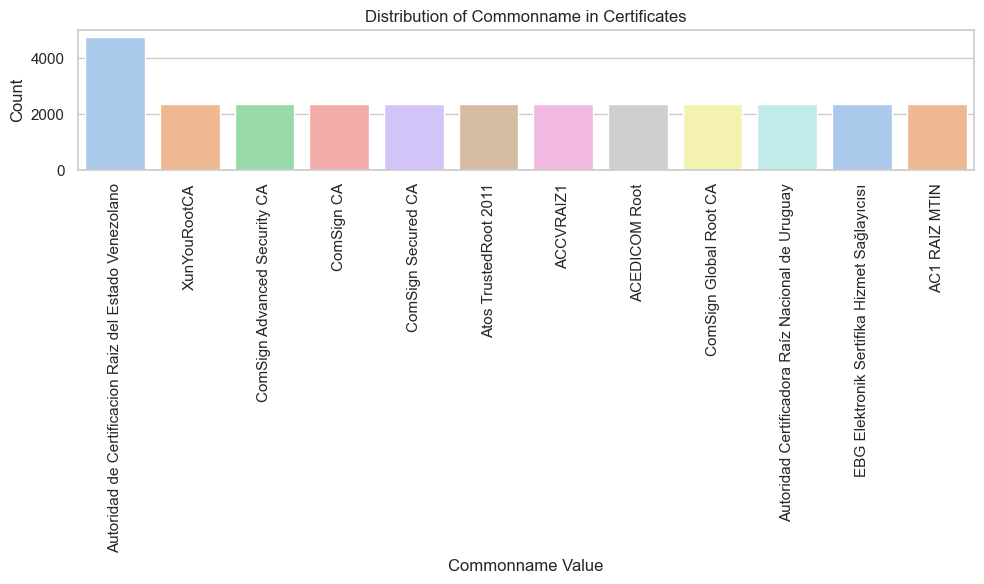

D:\zm157\AppData\Local\Temp\ipykernel_22172\2462027294.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_values.keys()), y=list(sorted_values.values()), palette=custom_palette)
D:\zm157\AppData\Local\Temp\ipykernel_22172\2462027294.py:41: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x=list(sorted_values.keys()), y=list(sorted_values.values()), palette=custom_palette)


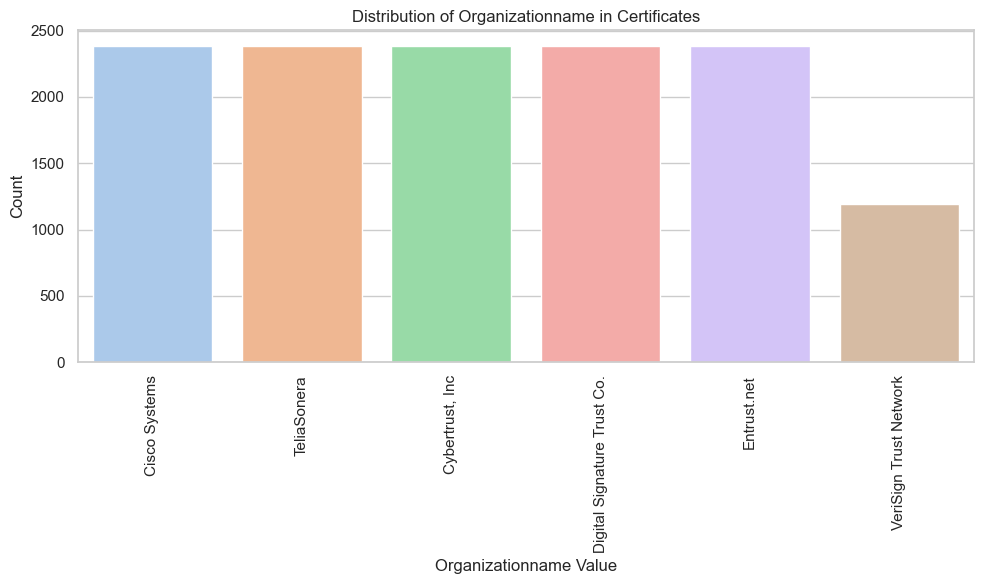

D:\zm157\AppData\Local\Temp\ipykernel_22172\2462027294.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_values.keys()), y=list(sorted_values.values()), palette=custom_palette)
D:\zm157\AppData\Local\Temp\ipykernel_22172\2462027294.py:41: UserWarning: 
The palette list has fewer values (10) than needed (44) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=list(sorted_values.keys()), y=list(sorted_values.values()), palette=custom_palette)


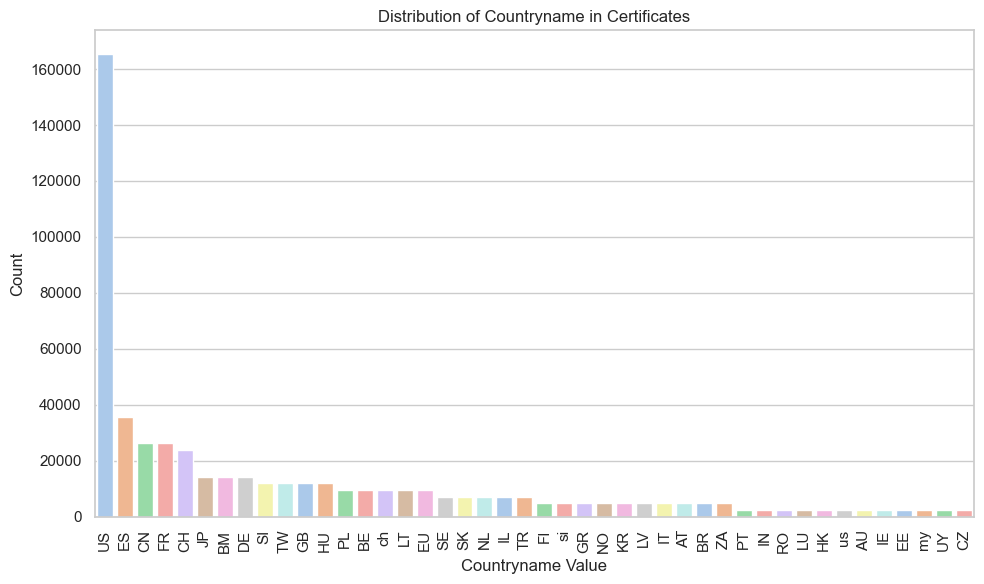

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_country_and_organization(data):
    print("Certificate Fields Analysis:")

    collect = {'commonName': {}, 'organizationName': {}, 'countryName': {}}

    for item in data:
        cert_chains = item['cert_chain']
        for cert in cert_chains:
            subject = cert['subject']
            issuer = cert['issuer']

            # Extract values from subject and issuer
            for field in ['commonName', 'organizationName', 'countryName']:
                if field in subject[0][0]:
                    value = subject[0][0][1]
                    if value not in collect[field]:
                        collect[field][value] = 0
                    collect[field][value] += 1

                if field in issuer[0][0]:
                    value = issuer[0][0][1]
                    if value not in collect[field]:
                        collect[field][value] = 0
                    collect[field][value] += 1

    # Set a more stylish Seaborn theme
    sns.set_theme(style="whitegrid")

    # Define a custom color palette
    custom_palette = sns.color_palette("pastel")

    # Plot the results with the updated style and sorting
    for field, values in collect.items():
        # Sort values based on count in descending order
        sorted_values = {k: v for k, v in sorted(values.items(), key=lambda item: item[1], reverse=True)}

        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(sorted_values.keys()), y=list(sorted_values.values()), palette=custom_palette)
        plt.title(f"Distribution of {field.capitalize()} in Certificates")
        plt.xlabel(f"{field.capitalize()} Value")
        plt.ylabel("Count")
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()

# Call the function with your data
analyze_country_and_organization(all_data)


Certificate Versions Analysis:


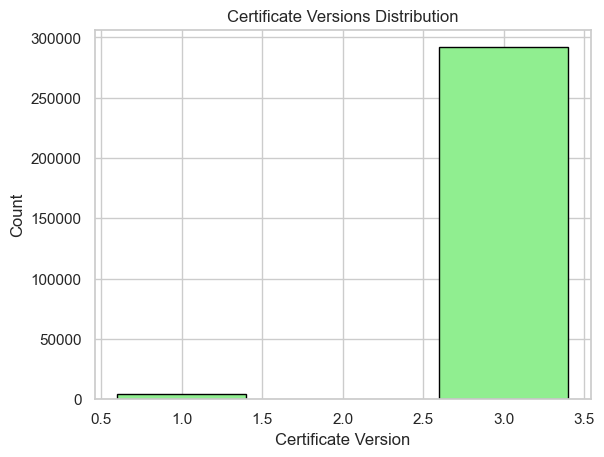

In [27]:
def analyze_certificate_versions(data):
    print("Certificate Versions Analysis:")
    versions = [cert.get("version", "") for item in data for cert in item.get("cert_chain", [])]

    # 绘制证书版本分布图
    plt.bar(Counter(versions).keys(), Counter(versions).values(), color='lightgreen', edgecolor='black')
    plt.title("Certificate Versions Distribution")
    plt.xlabel("Certificate Version")
    plt.ylabel("Count")
    plt.show()
analyze_certificate_versions(all_data)

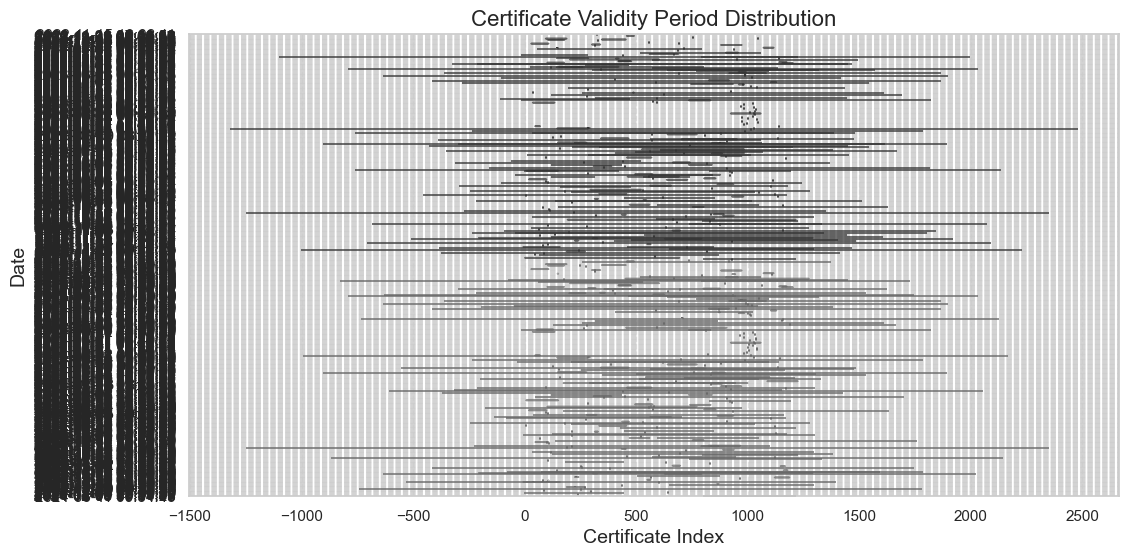

((datetime.datetime(2022, 11, 15, 10, 8, 11),
  datetime.datetime(2022, 11, 16, 7, 49, 59),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 0, 0),
  datetime.datetime(2022, 11, 21, 2, 6, 6),
  datetime.datetime(2022, 11, 29, 8, 41, 57),
  datetime.datetime(2022, 12, 5, 0, 0),
  datetime.datetime(2022, 12, 7, 8, 29, 57),
  datetime.datetime(2022, 12, 7, 15, 27, 7),
  datetime.datetime(2022, 12, 12

In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from datetime import datetime
# 
# def analyze_certificate_validity_period(data):
#     # Extract date information
#     valid_from_dates = [datetime.strptime(item.get("valid_from", ""), "%Y%m%d%H%M%SZ") for item in data]
#     valid_until_dates = [datetime.strptime(item.get("valid_until", ""), "%Y%m%d%H%M%SZ") for item in data]
# 
#     # Generate certificate index list
#     certificate_indices = list(range(1, len(valid_from_dates) + 1))
# 
#     # Sort by date
#     valid_from_dates, valid_until_dates, certificate_indices = zip(
#         *sorted(zip(valid_from_dates, valid_until_dates, certificate_indices)))
# 
#     # Create a DataFrame for Seaborn
#     import pandas as pd
#     df = pd.DataFrame({'Certificate Index': certificate_indices,
#                        'Valid From': valid_from_dates,
#                        'Valid Until': valid_until_dates})
# 
#     # Set Seaborn style and use a grayscale color palette
#     sns.set(style="whitegrid")
#     grayscale_palette = sns.color_palette("gray", 2)
# 
#     # Create a violin plot
#     plt.figure(figsize=(12, 6))
#     ax = sns.violinplot(x='Certificate Index', y='Valid From', data=df, inner='quartile', color=grayscale_palette[0])
#     sns.violinplot(x='Certificate Index', y='Valid Until', data=df, inner='quartile', color=grayscale_palette[1], ax=ax)
# 
#     # Set title and labels
#     plt.title("Certificate Validity Period Distribution")
#     plt.xlabel("Certificate Index")
#     plt.ylabel("Date")
# 
#     # Show the plot
#     plt.show()
# 
#     return valid_from_dates, valid_until_dates
# 
# # Call the function with your data
# analyze_certificate_validity_period(all_data)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

def analyze_certificate_validity_period(data):
    # Extract date information
    valid_from_dates = [datetime.strptime(item.get("valid_from", ""), "%Y%m%d%H%M%SZ") for item in data]
    valid_until_dates = [datetime.strptime(item.get("valid_until", ""), "%Y%m%d%H%M%SZ") for item in data]

    # Generate certificate index list
    certificate_indices = list(range(1, len(valid_from_dates) + 1))

    # Sort by date
    valid_from_dates, valid_until_dates, certificate_indices = zip(
        *sorted(zip(valid_from_dates, valid_until_dates, certificate_indices)))

    # Create a DataFrame for Seaborn
    import pandas as pd
    df = pd.DataFrame({'Certificate Index': certificate_indices,
                       'Valid From': valid_from_dates,
                       'Valid Until': valid_until_dates})

    # Set Seaborn style and use a grayscale color palette
    sns.set(style="whitegrid")
    grayscale_palette = sns.color_palette("gray", 2)

    # Create a violin plot
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Certificate Index', y='Valid From', data=df, inner='quartile', color=grayscale_palette[0], alpha=0.7)
    sns.violinplot(x='Certificate Index', y='Valid Until', data=df, inner='quartile', color=grayscale_palette[1], ax=ax, alpha=0.7)

    # Set title and labels
    plt.title("Certificate Validity Period Distribution", fontsize=16)
    plt.xlabel("Certificate Index", fontsize=14)
    plt.ylabel("Date", fontsize=14)

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.5)

    # Save the plot as an image file (e.g., PNG)
    plt.savefig("certificate_validity_distribution.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    return valid_from_dates, valid_until_dates

# Call the function with your data
analyze_certificate_validity_period(all_data)


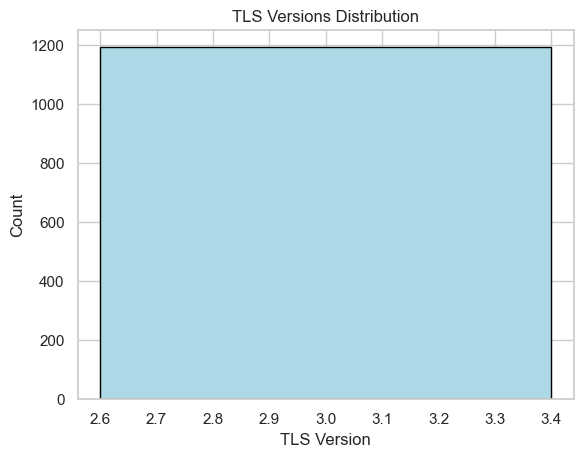

Counter({3: 1191})

In [29]:
def analyze_tls_version(data):
    tls_versions = Counter(item.get("version", "") for item in data)

    # 绘制 TLS 版本分布图
    plt.bar(tls_versions.keys(), tls_versions.values(), color='lightblue', edgecolor='black')
    plt.title("TLS Versions Distribution")
    plt.xlabel("TLS Version")
    plt.ylabel("Count")
    plt.show()
    return tls_versions
analyze_tls_version(all_data)

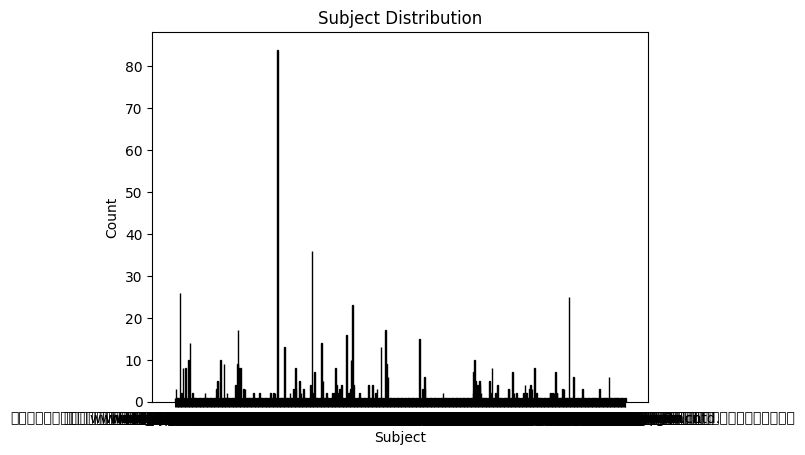

Counter({'上海市金山区行政服务中心': 1,
         '上海市大数据中心': 3,
         'www.shchangxing.gov.cn': 1,
         '上海市崇明区行政服务中心、上海市崇明区大数据中心（上海市崇明区公共资源交易中心）': 1,
         '上海虹桥国际中央商务区管理委员会': 1,
         '上海市普陀区融媒体中心': 1,
         '中国科学院': 26,
         'xssc.ac.cn': 1,
         '央视国际网络有限公司': 2,
         'www.cangyuan.gov.cn': 1,
         '楚雄彝族自治州人民政府办公室': 8,
         '*.dh.gov.cn': 1,
         'wza.diqing.gov.cn': 1,
         '大理白族自治州人民政府办公室': 8,
         'www.fugong.gov.cn': 1,
         'www.gongshan.gov.cn': 1,
         'www.huize.gov.cn': 1,
         '普洱市人民政府办公室': 10,
         '景洪市人民政府办公室': 1,
         '昆明市人民政府办公室（昆明市人民政府参事室）': 14,
         'www.lanping.gov.cn': 1,
         'www.lincang.gov.cn': 1,
         '保山市人民政府办公室': 2,
         'www.luliang.gov.cn': 1,
         'luoping.gov.cn': 1,
         'malong.gov.cn': 1,
         'www.nujiang.gov.cn': 1,
         'qeda.qj.gov.cn': 1,
         'china37.net': 1,
         'www.qj.gov.cn': 1,
         'qjfy.gov.cn': 1,
         'ql.gov.cn': 1,
         'www.s

In [20]:
def analyze_subject(data):
    subject = Counter(item.get("subject", "") for item in data)

    # 绘制 TLS 版本分布图
    plt.bar(subject.keys(), subject.values(), color='lightblue', edgecolor='black')
    plt.title("Subject Distribution")
    plt.xlabel("Subject")
    plt.ylabel("Count")
    plt.show()
    return subject
analyze_subject(all_data)

D:\PyCharmProject\WebsiteCollectAndAnalysis\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26234 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\PyCharmProject\WebsiteCollectAndAnalysis\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24935 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\PyCharmProject\WebsiteCollectAndAnalysis\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30721 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\PyCharmProject\WebsiteCollectAndAnalysis\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\PyCharmProject\WebsiteCollectAndAnalysis\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 26234 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\PyCh

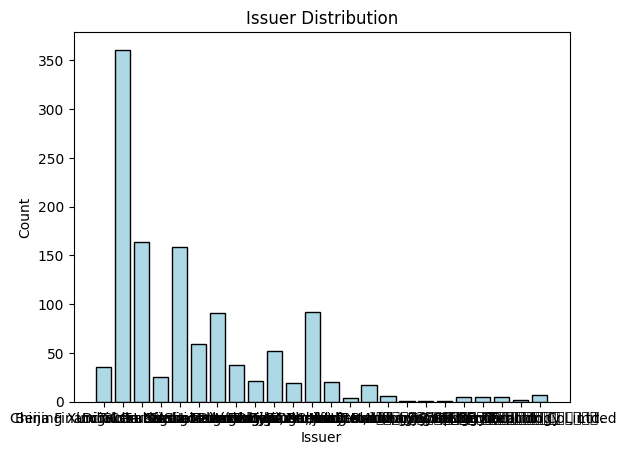

Counter({'UniTrust': 36,
         'DigiCert Inc': 361,
         'China Financial Certification Authority': 164,
         'GlobalSign nv-sa': 25,
         'Beijing Xinchacha Credit Management Co., Ltd.': 159,
         'Sectigo Limited': 59,
         'TrustAsia Technologies, Inc.': 91,
         "Let's Encrypt": 38,
         'sslTrus': 21,
         'WoTrus CA Limited': 52,
         'DigiCert, Inc.': 19,
         'Global Digital Cybersecurity Authority Co., Ltd.': 92,
         'iTrusChina Co., Ltd.': 20,
         'Shenzhen Digital Certificate Authority Center Co., Ltd': 4,
         'Xin Net Technology Corp.': 17,
         'Baidu, Inc.': 6,
         'Kingnet Information Technology Co., Ltd.': 1,
         '联通智慧安全科技有限公司': 1,
         'Zhejiang Huluwa Digital Certification Co., Ltd.': 1,
         'JoySSL Limited': 5,
         'DNSPod, Inc.': 5,
         '北京新网数码信息技术有限公司': 5,
         'CerSign Technology Limited': 2,
         '北京中万网络科技有限责任公司': 7})

In [17]:
def analyze_issuer(data):
    issuer = Counter(item.get("issuer", "") for item in data)
    # 绘制 TLS 版本分布图
    plt.bar(issuer.keys(), issuer.values(), color='lightblue', edgecolor='black')
    plt.title("Issuer Distribution")
    plt.xlabel("Issuer")
    plt.ylabel("Count")
    plt.show()
    return issuer
analyze_issuer(all_data)